<font size='5'><h1 ><center> **Plants Identification by Deep Learning**</center></h1></font>

# Memory Information

In [7]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 12.67GB
Available: 10.85GB
Used: 1.51GB
Percentage: 14.4%


# GPU Information

In [8]:
! nvidia-smi

Mon Dec 23 02:00:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Access files in Drive**



In [9]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


#### Load required libraries

In [10]:
import numpy as np # linear algebra
import pandas as pd  # data processing
import os #  to interact with files using there paths
from sklearn.datasets import load_files

### Loading the Data

In [11]:
data_dir =  r'/gdrive/My Drive/flowers'
data = load_files(data_dir)

### **Data Preprocessing and exploring**

In [12]:
folders=os.listdir("/gdrive/My Drive/flowers")
print(folders)

['tulip', 'daisy', 'dandelion', 'sunflower', 'rose']


In [13]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/gdrive/My Drive/flowers/tulip/8585102913_d80d3e2ff7_n.jpg'
 '/gdrive/My Drive/flowers/tulip/13542672763_20c3cb9272.jpg'
 '/gdrive/My Drive/flowers/rose/323872063_7264e7e018_m.jpg' ...
 '/gdrive/My Drive/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/gdrive/My Drive/flowers/rose/9633056561_6f1b7e8faf_m.jpg'
 '/gdrive/My Drive/flowers/sunflower/15495578821_92c6d14252_n.jpg']
Target labels -  [4 4 2 ... 1 2 3]


In [14]:
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)

print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  4327
Number of training targets :  4327


In [15]:
from keras.preprocessing.image import img_to_array, load_img

def convert_img_to_arr(file_path_list):
    arr = []
    img_width, img_height = 150,150
    for file_path in file_path_list:
        img = load_img(file_path, target_size = (img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
    return arr

X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item : ',X[0])

(4327, 150, 150, 3)
First training item :  [[[ 29.  29.  29.]
  [ 29.  29.  29.]
  [ 30.  30.  32.]
  ...
  [  7.   7.   5.]
  [  7.   7.   5.]
  [  6.   6.   4.]]

 [[ 29.  29.  29.]
  [ 29.  29.  29.]
  [ 30.  30.  32.]
  ...
  [  7.   7.   5.]
  [  7.   7.   5.]
  [  7.   7.   5.]]

 [[ 29.  29.  29.]
  [ 29.  29.  29.]
  [ 30.  30.  32.]
  ...
  [  7.   7.   5.]
  [  7.   7.   5.]
  [  7.   7.   5.]]

 ...

 [[ 33.  22.  20.]
  [ 33.  22.  20.]
  [ 33.  22.  20.]
  ...
  [ 86.  93.  86.]
  [ 96. 107.  93.]
  [ 23.  37.   4.]]

 [[ 33.  22.  20.]
  [ 33.  22.  20.]
  [ 33.  22.  20.]
  ...
  [ 25.  37.   1.]
  [ 29.  44.   3.]
  [ 38.  55.   0.]]

 [[ 33.  22.  20.]
  [ 33.  22.  20.]
  [ 33.  22.  20.]
  ...
  [ 38.  50.  14.]
  [ 34.  48.  13.]
  [ 38.  53.  10.]]]


### Take a look at some pictures

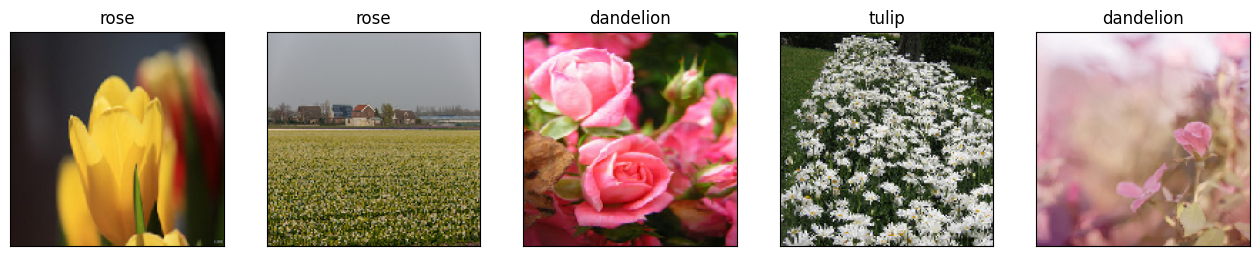

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,9))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow((X[i].astype(np.uint8)))
    plt.title(folders[y[i]])

In [17]:
X = X.astype('float32')/255
no_of_classes = len(np.unique(y))
no_of_classes

5

In [18]:
y

array([4, 4, 2, ..., 1, 2, 3])

In [19]:
!pip install keras

In [22]:
# pip install tensorflow --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [27]:
from keras.utils import to_categorical

y = np.array(to_categorical(y,no_of_classes))
y[0]

array([0., 0., 0., 0., 1.])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print('The test Data Shape ', X_test.shape[0])

X_test, X_valid, y_test, y_valid = train_test_split(X_test,y_test, test_size = 0.5)
print('The training Data Shape ', X_valid.shape[0])

The test Data Shape  866
The training Data Shape  433


In [29]:
print('The train Data Shape ', X_train.shape[1:])

The train Data Shape  (150, 150, 3)


### **CNN Implementation**
> This is an image that shows how our CNN architecture looks like :



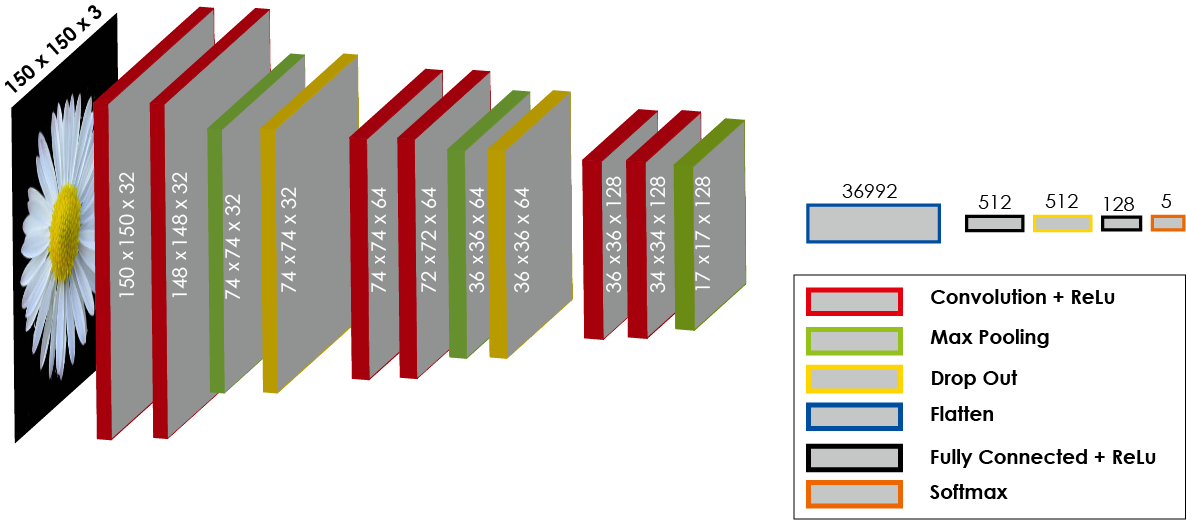

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau

### CNN Architecture
I will be using Sequential method as I am creating a sequential model. **Sequential model means that all the layers of the model will be arranged in sequence**, then i will add:
> * 2 x convolution layer of 32 channel of 3x3 kernal and same padding;
* 1 x maxpool layer of 2x2 pool size;
* 1 x droupt with a frequency of rate equal to 0.25;
* 2 x convolution layer of 64 channel of 3x3 kernal and same padding:
* 1 x maxpool layer of 2x2 pool size
* 1 x droupt with a frequency of rate equal to 0.25;
* 2 x convolution layer of 128 channel of 3x3 kernal and same padding;
* 1 x maxpool layer of 2x2 pool size;
* 1 x flatten;
* 1 x dense layer of 512
* 1 x dropout set at 0.5
* 1 x dense layer of 128
* 1 x Dense Softmax layer of 5 units

=> **Dropout** is a technique of regularisation which helps us to prevent _**overfitting**_.

If you noticed, I also add **ReLu** (Rectified Linear Unit) activation to each layers so that all the negative values are not passed to the next layer:)


In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=X_train.shape[1:], activation='relu', name='Conv2D_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))

model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=no_of_classes, activation='softmax', name='Output'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Summary

In [33]:
# Getting the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv2D_1 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_2 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpool_1 (MaxPooling2D)             │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_3 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_4 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpool_2 (MaxPooling2D)             │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_5 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2D_6 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Maxpool_3 (MaxPooling2D)             │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_1 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,293,733 (73.60 MB)

 Trainable params: 19,293,733 (73.60 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 100
batch_size=32

train_datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    X_train,y_train,
    batch_size=batch_size)

validation_generator = test_datagen.flow(
    X_valid,y_valid,
    batch_size=batch_size)

checkpointer = ModelCheckpoint(filepath = "/gdrive/My Drive/PId_Best.keras", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)


start = time.time()

history=model.fit(train_generator,
                            epochs=epochs,
                            validation_data = validation_generator,
                            verbose=1,
                            steps_per_epoch=len(X_train) // batch_size,
                            #validation_steps=len(X_valid) //batch_size,
                            callbacks=[checkpointer, learning_rate_reduction])

end = time.time()

duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.2355 - loss: 1.7941
Epoch 1: val_loss improved from inf to 1.39521, saving model to /gdrive/My Drive/PId_Best.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 282ms/step - accuracy: 0.2360 - loss: 1.7924 - val_accuracy: 0.3741 - val_loss: 1.3952 - learning_rate: 0.0010
Epoch 2/100
  1/108 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5625 - loss: 1.2115

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.39521 to 1.34269, saving model to /gdrive/My Drive/PId_Best.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5625 - loss: 1.2115 - val_accuracy: 0.4249 - val_loss: 1.3427 - learning_rate: 0.0010
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.4456 - loss: 1.3194
Epoch 3: val_loss improved from 1.34269 to 1.24798, saving model to /gdrive/My Drive/PId_Best.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.4457 - loss: 1.3191 - val_accuracy: 0.5058 - val_loss: 1.2480 - learning_rate: 0.0010
Epoch 4/100
  1/108 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4375 - loss: 1.2261
Epoch 4: val_loss improved from 1.24798 to 1.18977, saving model to /gdrive/My Drive/PId_Best.keras
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4375 - loss: 1.2261 - val_accuracy: 0.4873 - val_loss: 1.1898 - learning_rate: 0.0010
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5025 - loss: 1.1948
Epoch

### Model Evaluation

In [40]:
(eval_loss, eval_accuracy) = model.evaluate(
     X_test, y_test, batch_size=batch_size, verbose=2)

print("Accuracy: {:.2f}%".format(eval_accuracy * 100))
print("Loss: {}".format(eval_loss))

14/14 - 2s - 154ms/step - accuracy: 0.7552 - loss: 0.6827
Accuracy: 75.52%
Loss: 0.6826634407043457


### Acuuracy and Loss graphs

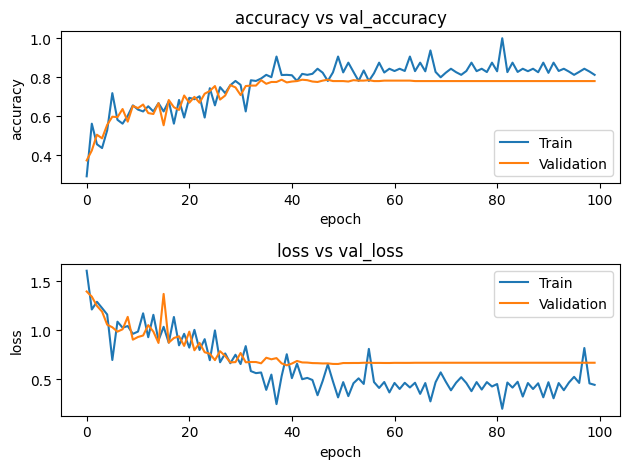

In [41]:
import matplotlib.pyplot as plt
def plot(history):
    plt.figure(1)
    #plt.figure(figsize=(10,10))

     # summarize history for accuracy

    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy vs val_accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')

     # summarize history for loss

    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss vs val_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()

plot(history)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


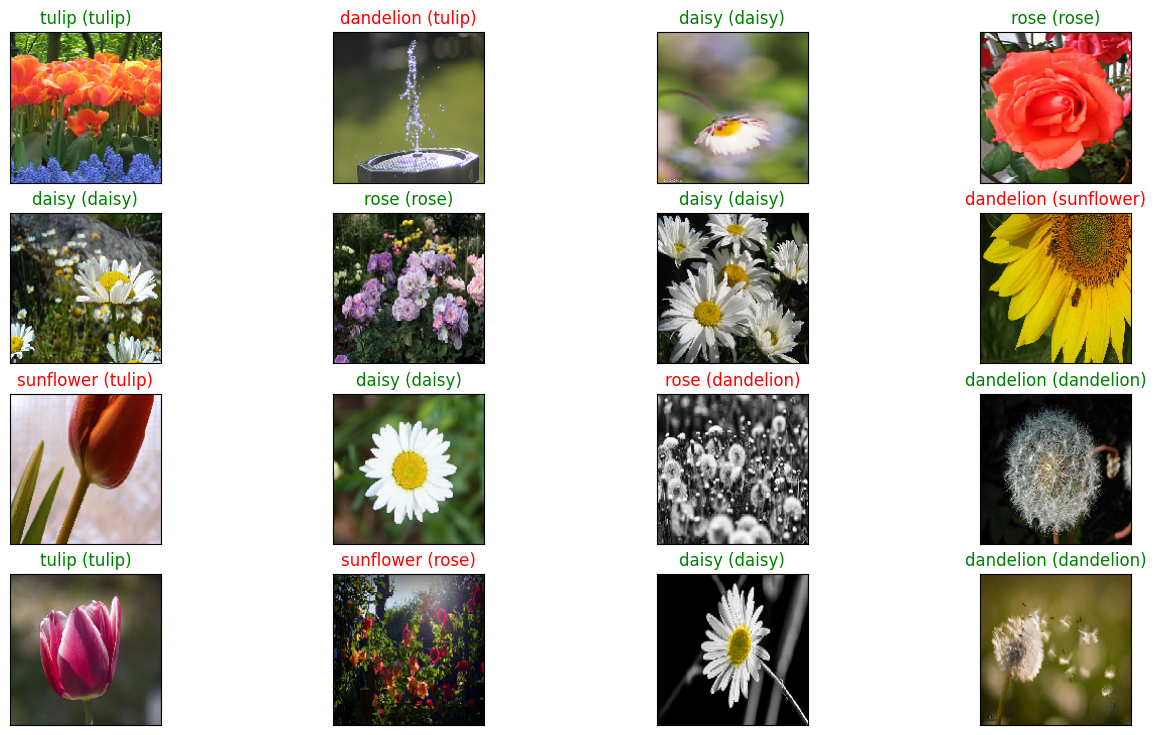

In [42]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(model.predict(X_test))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


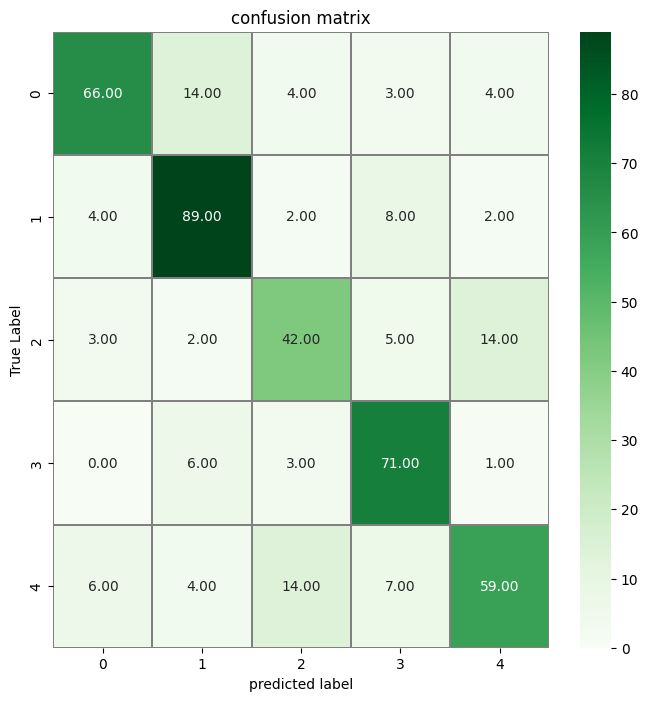

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

In [45]:
my_model=keras.models.load_model('/gdrive/My Drive/PId_Best.keras')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


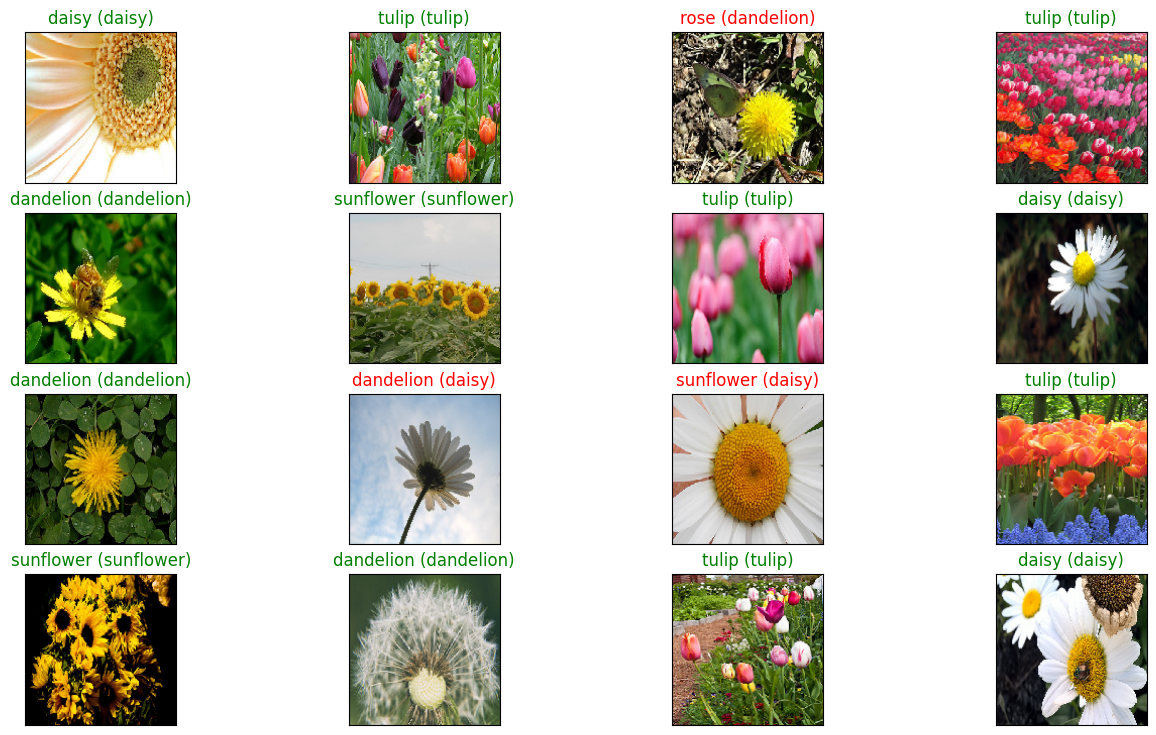

In [46]:
def visualize_pred(y_pred):
    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(X_test.shape[0], size=16, replace=False)):
        ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(X_test[idx]))
        pred_idx = np.argmax(y_pred[idx])
        true_idx = np.argmax(y_test[idx])
        ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                     color=("green" if pred_idx == true_idx else "red"))

visualize_pred(my_model.predict(X_test))